Визуализация данных из mlcupopen

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv('../../mlcourse_open/data/mlbootcamp5_train.csv', sep=';', index_col='id')

In [74]:
df.head()

,age,age_in_years,gender,sex_descr,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
id,,,,,,,,,,,,,,,,
0,18393,50,2,man,168,62.0,110,80,1,1,0,0,1,0,21.967120,3
1,20228,55,1,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679,5
2,18857,51,1,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805,3
3,17623,48,2,man,169,82.0,150,100,1,1,0,0,1,1,28.710479,4
4,17474,47,1,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177,3


In [54]:
df.insert(loc=1, column = 'age_in_years', value = (df['age']/365.25).astype(int)),
df.insert(loc=3, column = 'sex_descr', value = df['gender'].map({2:'man', 1:'woman'})),
df.insert(loc=len(df.columns), column = 'bmi', value = df['weight']/((df['height']/100)**2))

In [73]:
df.insert(loc=len(df.columns), column = 'bmi_cat', value=\
df['bmi'].apply(lambda x: 1 if x<=16 else
                          2 if x<18.5 else
                          3 if x<25 else
                          4 if x<30 else
                          5 if x<35 else
                          6 if x<40 else 7))

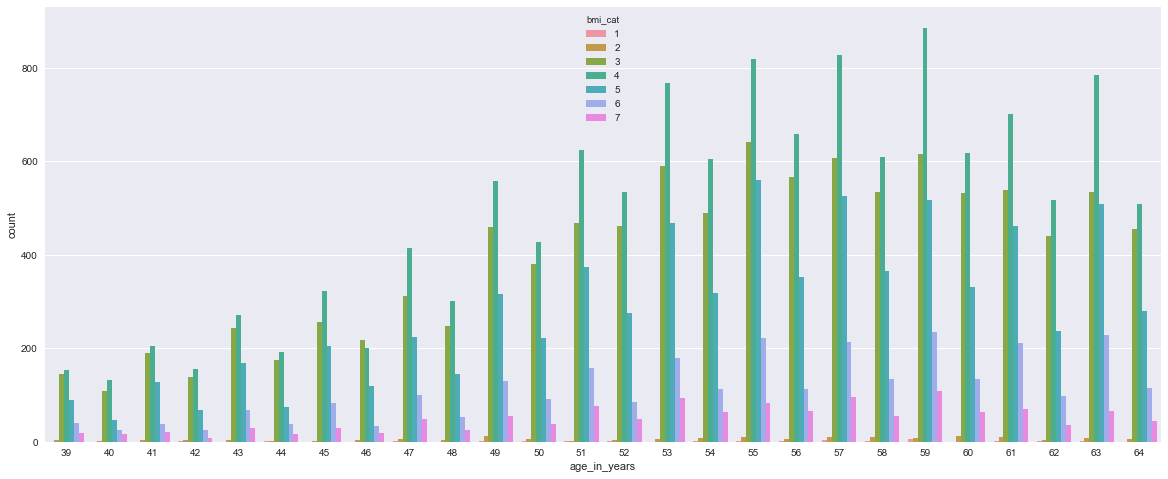

In [117]:
plt.rcParams['figure.figsize']=[20,8]
sns.countplot(x='age_in_years', data=df[df['cardio']==1], hue = 'bmi_cat')


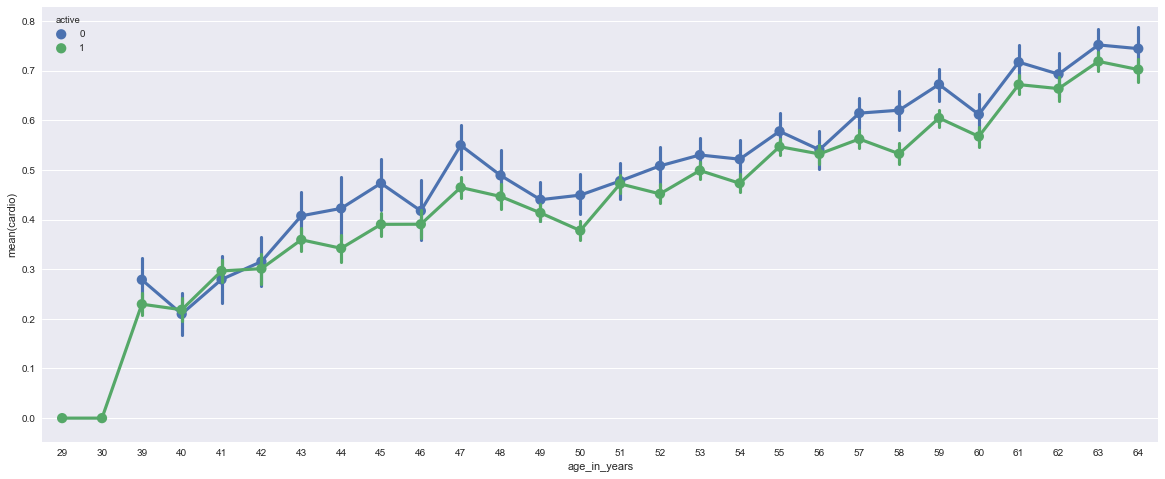

In [123]:
sns.pointplot(x='age_in_years', y='cardio', data=df, hue = 'active')